# 1A.data - Visualisation des données - graphes interactifs

Les graphiques interactif permettent d'afficher plus d'information sur le même graphe mais comme le lecteur ne peut déchiffrer des graphes trop chargés, il interagit pour restreindre sa lecture à une zone précise. Le zoom est indispensable pour visualiser des données très localisées sur de grandes zones géographiques mais ce n'est pas la seule.

Seules une ou deux librairies sont démontrées dans ce notebooks mais il en existe un palanquée : [10 plotting libraries](http://www.xavierdupre.fr/app/jupytalk/helpsphinx/2016/pydata2016.html).

In [1]:
%matplotlib inline

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

<h2 id="inter">Graphiques interactifs</h2>

Ce sujet sort du cadre de cette séance. Un graphique interactif réagit à des événéments comme le passage du curseur de la souris, un clic, un zoom. Il est difficile de lire un graphique trop chargé, c'est pourquoi en rendant le graphique interactifs, on cherche à donner plus d'information sans nuire à sa lisibilité. Voici quelques scénarios :

- On veut représenter une des dimensions du problème en animant le graphique. C'est fréquent en 3D où un des axes est celui du temps. On préfèrera un graphique en 2D évoluant dans le temps.
- Lorsqu'il y a trop de courbes à dessiner, le lecteur peut activer ou désactiver certaines courbes pour pouvoir les comparer. 
- On peut permettre de changer d'échelle (logarithmique ou changer la base 100 à différents endroits).
- On veut donner une vue d'ensemble et en même temps un niveau de détails plus fin si le lecteur le demande.

Ces animations pris leur essor avec internet et le langage [javascript](http://fr.wikipedia.org/wiki/JavaScript). Concevoir un graphique animé nécessite plus de temps car il faut prévoir ce qu'il doit se passer en cas d'action du lecteur (souris, touche, ...). Les modules python permettant de les créer construisent en fait un code javascript qu'il faut ensuite exécuter dans un navigateur (ou directement dans un notebook comme celui-ci). La librairie javascript qui a changé la façon de les concevoir est [d3.js](http://d3js.org/). Beaucoup d'autres librairies sont des surcouches de celle-ci [nvd3](http://nvd3.org/). 

Une des plus connues est [bokeh](https://bokeh.pydata.org/en/latest/).

In [3]:
import bokeh, bokeh.io as bio
bio.output_notebook()

Loading BokehJS ...

Une fois que le module est initialisé, on peut afficher son graphique.

In [4]:
import bokeh.plotting as bplt
p = bplt.figure(title = "Exemple")
p.xaxis.axis_label = 'X'
p.yaxis.axis_label = 'Y'

p.circle([1,2,3,4],[4,5,6,5.5], fill_color="red", color="red", size=12)
bplt.show(p)

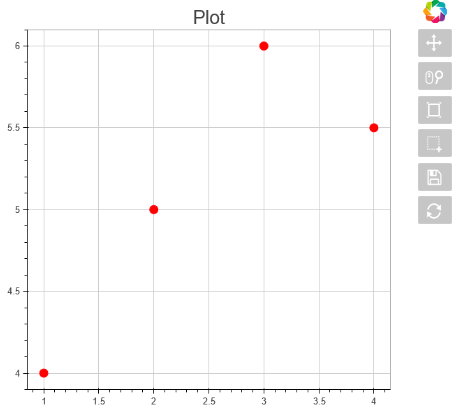

In [5]:
from pyquickhelper.helpgen import NbImage  # seconde image
NbImage("pngbokeh.png")            # pour la conversion des notebooks au format HTML

Pour sauver le graph sous forme de fichier HTML :

In [6]:
import os
bplt.output_file("example_bokeh.html")
bplt.save(p)
print([ _ for _ in os.listdir(".") if "html" in _ ] )

['example_bokeh.html']


[plotly](https://plot.ly/) est également une librairie très connue car plutôt réussie visuellement. Prévu initialement comme un service - les utisateurs mettaient en ligne leur graphique -, elle est maintenant disponible dans un mode *offline*, sans connexion extérieure. Elle fonctionne comme *bokeh* avec une étape d'initialisation.

In [7]:
from plotly.offline import init_notebook_mode
init_notebook_mode()

Puis un graphique issu du tutoriel, ou le [guide d'utilisateur](https://plot.ly/python/user-guide/). Le code de l'API offline est sur GitHub avec notemment la fonction [iplot](https://github.com/plotly/plotly.py/blob/master/plotly/offline/offline.py#L283).

In [8]:
import plotly.graph_objs as go
from plotly.offline import iplot

import numpy as np

x = np.random.randn(500)
y = np.random.randn(500)
iplot([go.Histogram2dContour(x=x, y=y, contours=dict(coloring='heatmap')),
       go.Scatter(x=x, y=y, mode='markers', marker=dict(color='white', size=3, opacity=0.3))],
      show_link=False,
      image_width=500)

## Exercice 1 : choisir une librairie interactive et faire un graphe

De préférence une que vous ne connaissez pas.